In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
plt.style.use('seaborn-notebook')
plt.style.use('ggplot')

# 5.1 Discrete probability simulation

a) simlluate process

This would be a binomial process with success rate 0.6 and stopping criteria of failure 2 in a row

In [3]:
np.random.binomial(1,0.6)

0

In [4]:
stopping_criteria = False
shots = []
p = 0.6
shots.append(np.random.binomial(1,0.6)) #first shot
while stopping_criteria == False:
    shot = np.random.binomial(1,0.6)
    print(f"shot is {shot}, last shot is {shots[-1]}")
    if (shots[-1] == 0) & (shot == 0):
        stopping_criteria = True
    shots.append(shot)

shot is 0, last shot is 0


In [5]:
def basketball_throws(n):
    dist_shots = []
    for i in range(0,n):
        stopping_criteria = False
        shots = []
        p = 0.6
        shots.append(np.random.binomial(1,0.6)) #first shot
        while stopping_criteria == False:
            shot = np.random.binomial(1,0.6)
            if (shots[-1] == 0) & (shot == 0):
                stopping_criteria = True
            shots.append(shot)
        dist_shots.append(shots)
    return dist_shots

In [6]:
dist_shots = basketball_throws(1000)

In [7]:
num_shots_sim = [len(x) for x in dist_shots]

In [8]:
np.mean(num_shots_sim)

8.513

In [9]:
np.std(num_shots_sim)

6.574179112254244

(array([405., 269., 143.,  86.,  37.,  29.,  12.,  12.,   4.,   3.]),
 array([ 2. ,  5.8,  9.6, 13.4, 17.2, 21. , 24.8, 28.6, 32.4, 36.2, 40. ]),
 <a list of 10 Patch objects>)

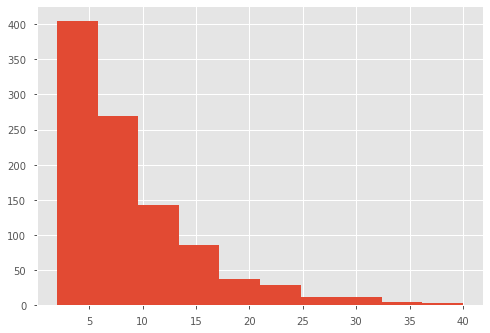

In [10]:
plt.hist(num_shots_sim)

In [11]:
success_shots_sim = [sum(x)/len(x) for x in dist_shots]

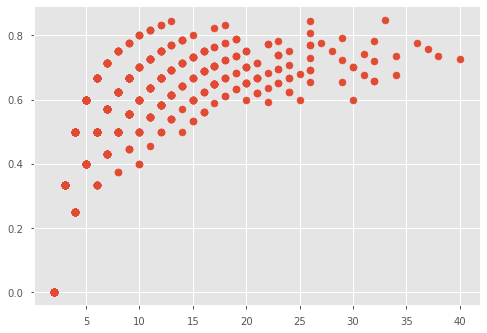

In [12]:
plt.scatter(num_shots_sim, success_shots_sim)

# 5.2 Continuous probability simulation

An additional information here is that there's approximately 52% women in US and 48% men. I wish the problem gives all the necessary information....

In [13]:
def sim_weight(n_sim=1000, n_draw=10):
    dist_log_weight = []
    for i in range(0, n_sim):
        #initialize
        log_weight = []
        for j in range(1,n_draw):
            gender = np.random.binomial(0,0.52)# 1 being female
            if gender == 1:
                person_log_weight = np.random.normal(4.96, 0.20)
            else:
                person_log_weight = np.random.normal(5.13, 0.17)
            log_weight.append(person_log_weight)
        dist_log_weight.append(log_weight)
    return dist_log_weight

In [14]:
dist_log_weight = sim_weight()

In [15]:
#calculate the sum of each of those 10 people

In [16]:
sum_weight = [sum(np.exp(x)) for x in dist_log_weight]

In [17]:
max_weight = 1750

In [18]:
greater_than_max = np.where(np.array(sum_weight) > max_weight, 1, 0)

do it by the discrete probability from last time. Assume that each trial (get 10 ppl) is an independent survey, and we have surveyed 1000 times, what's the proportion of surveys that exceeds the max weight and the error?

In [19]:
#empirical odds
empirical_odds = greater_than_max.sum()/len(greater_than_max)

In [20]:
empirical_odds

0.012

In [20]:
#empirical error 
empirical_error = np.sqrt(empirical_odds*(1-empirical_odds)/10) #10 because that's the actual sample, we just did the 10 draws 1000 times

In [21]:
empirical_error

0.04204283529925164

Alternatively we can think about it in terms of just distributions. NULL hypothesis is that weight - max_weight = 0. What is the probability (i.e cdf of this normal distribution that weight-max_weight > 0)?

Essentially, we just have to find the standard deviation of the distribution weight - max_weight

In [22]:
sigma = np.std(np.array(sum_weight) - max_weight)

In [23]:
sigma

90.20763983253585

In [24]:
mean = np.mean(np.array(sum_weight)-max_weight)

In [25]:
mean

-207.53613330010347

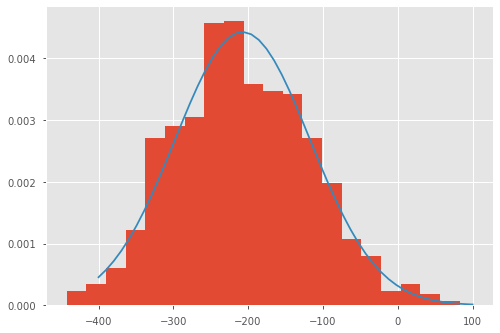

In [26]:
plt.hist(np.array(sum_weight)-max_weight, bins=20, density=True)
x = np.linspace(-400,100)
y = stats.norm.pdf(x,mean,sigma)
plt.plot(x,y)

In [27]:
z = (0-mean)/(sigma)
z

2.300649187645079

This mean would shift depending on the draws as well 

In [28]:
1-stats.norm.cdf(z)

0.010705734182230642

Is this within the empirical observation?

In [29]:
empirical_odds-2*empirical_error

-0.06608567059850327

In [30]:
empirical_odds

0.018

# 5.3 Binomial Distribution

In [31]:
stats.binom.pmf(k=3,n=10,p=0.4)

0.21499084800000012

In [32]:
def basketball_throws_3shots(n_sim=10000, n_trial=10):
    dist_shots = []
    for i in range(0,n_sim):
        trial = []
        for j in range(0, n_trial):
            x = np.random.binomial(1,0.4)
            trial.append(x)
        dist_shots.append(trial)
    return dist_shots

In [33]:
dist_shots_3shots = basketball_throws_3shots()

In [34]:
shots_made = [sum(x) for x in dist_shots_3shots]

In [35]:
exact_3_shots = np.where(np.array(shots_made)==3, 1, 0)

In [36]:
exact_3_shots.sum()/len(exact_3_shots)

0.2118

pretty close

In [37]:
empirical_error = np.sqrt(exact_3_shots.sum()/len(exact_3_shots)*(1-exact_3_shots.sum()/len(exact_3_shots))/len(exact_3_shots))

In [38]:
empirical_error

0.0040858384696412075

In [39]:
0.2159-2*empirical_error

0.2077283230607176

In [40]:
0.2159+2*empirical_error

0.22407167693928243

In [41]:
mean = np.mean(np.array(shots_made)-3)

In [42]:
mean

1.0025

In [43]:
sigma = np.std(np.array(shots_made) - 3) #note np.std is standard error, it divides by the sqrt(n)

In [44]:
sigma

1.5616957930403732

In [45]:
z = (0-mean)/sigma

In [46]:
stats.norm.pdf(z)

0.324660307703468

Very much skewed. I think this is what's happening in the above example as well, when we cannot just approximate everything by normal, because there was a binomial process involved to select male/female distribution

# 5.4 Demonstration of the CLT

In [47]:
def clt_sim(n_sim, n_trials=20):
    x = []
    for i in range(0, n_sim):
        x_j = 0
        for j in range(0, n_trials):
            x_j = x_j+np.random.uniform(0,1)
        x.append(x_j)
    return x

In [48]:
x = clt_sim(1000)

In [49]:
mean = np.mean(x)
sigma = np.std(x)

In [50]:
mean

10.011537468628871

In [51]:
sigma #note the actual sigma of the population is sigma*sqrt(n_trials)

1.2929488131596638

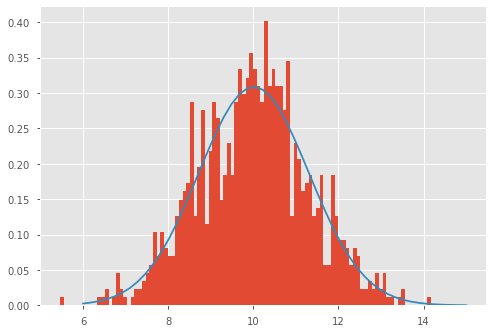

In [52]:
plt.hist(x, bins = 100, density=True)
plt.plot(np.linspace(6,15), stats.norm.pdf(np.linspace(6,15), mean,sigma))

More or less the same, but we are seeing some outliers here and there, there seem notably less distribution near the mean

# 5.5 Distribution of averages and differences

In [53]:
def height_sim(n_sim=1000, n_trial=100):
    height_diff = []
    for i in range(0, n_sim):
        male_height = []
        female_height = []
        for j in range(0, n_trial):
            male_height.append(np.random.normal(69.1, 2.9))
            female_height.append(np.random.normal(63.7,2.7))
        height_diff.append(np.mean(male_height)-np.mean(female_height))
    return height_diff

In [54]:
height_diff = height_sim()

In [55]:
print(f"""simulated x-y mean is {np.mean(height_diff)}, simulated x-y std is {np.std(height_diff)}
        actual x-y mean is {69.1-63.7}, actual x-y std is {np.sqrt(np.power(2.9,2)+np.power(2.7,2))}
        """)

simulated x-y mean is 5.385900605945135, simulated x-y std is 0.4038015317607049
        actual x-y mean is 5.3999999999999915, actual x-y std is 3.96232255123179
        


The standard deviation is way off, but that's because we are using standard error rather than standard deviation

In [56]:
np.std(height_diff)*np.sqrt(100) #we are using the 100 trial

4.038015317607049

(array([ 14.,  62., 133., 215., 241., 165., 105.,  46.,  14.,   5.]),
 array([4.32483012, 4.56788544, 4.81094077, 5.0539961 , 5.29705142,
        5.54010675, 5.78316207, 6.0262174 , 6.26927273, 6.51232805,
        6.75538338]),
 <a list of 10 Patch objects>)

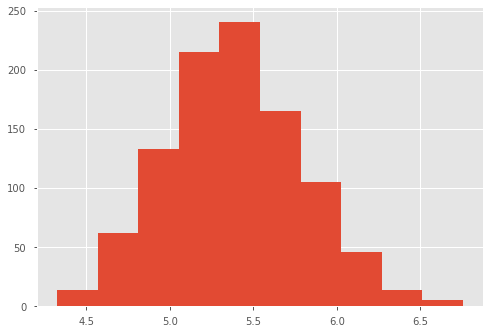

In [57]:
plt.hist(height_diff)

# 5.6 Propagation of Uncertainty

In [83]:
def cost_saving(trials = 10000, saving_per_unit = 5, error_saving = 4, volume = 40000, error = 10000):
    trial_results = []
    volume_results = []
    unit_saving_results = []
    for i in range(0, trials):
        unit_saving = np.random.normal(saving_per_unit, error_saving)
        unit_saving_results.append(unit_saving)
        volume_num = np.random.normal(volume, error)
        volume_results.append(volume_num)
        trial_results.append(unit_saving*volume)
    return trial_results, unit_saving_results, volume_results

In [84]:
trial_results, unit_saving_results, volume_results = cost_saving()

In [85]:
np.mean(trial_results)

202219.72319519348

In [86]:
np.std(trial_results)

160531.52865776123

Actual error is 
$\frac{\delta q}{Q} = \sqrt{ (\frac{\delta a}{a})^2  + (\frac{\delta b}{b})^2}$

In [64]:
np.sqrt(np.power(4.0/5.0,2)+np.power(10000/40000.0, 2))*(5*40000)

167630.5461424021

In [75]:
5*40000

200000

# 5.7 Coverage of confidence intervals

So we assume it's normal

In [124]:
def simulate_conf_int(n_trials = 100, mu = 6, sigma = 4):
    x = np.linspace(0, n_trials,n_trials)
    y = []
    for i in range(0, n_trials):
        y.append(np.random.normal(mu,sigma))
    y_conf_50 = np.array(y)*0.67*sigma
    y_conf_95 = np.array(y)*2*sigma
    return x,np.array(y), y_conf_50, y_conf_95

In [125]:
x,y,y_conf_50, y_conf_95 = simulate_conf_int()

<ErrorbarContainer object of 3 artists>

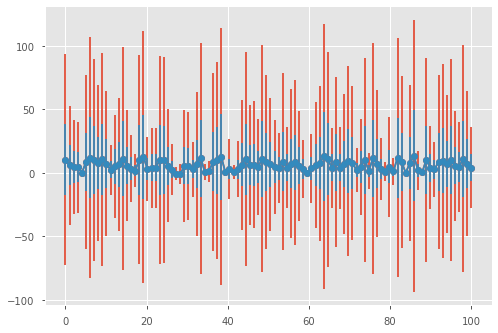

In [126]:
plt.errorbar(x,y,yerr=y_conf_95, fmt='-o')
plt.errorbar(x,y,yerr=y_conf_50, fmt='-o')

# 5.8 Converage of confidence intervals

a) simulate 1000 times, b) for each simulation check 95 confidence interval

In [163]:
def simulate_study(n_trials = 1000, mu = 0.10, sigma = 0.17):
    results = []
    for i in range(0, n_trials):
        results.append(np.random.normal(mu, sigma))
    return results

In [164]:
results = simulate_study()

In [165]:
mu = 0.10

In [166]:
sigma = 0.17

In [167]:
success = 0
for i in results:
    if mu >= i-2*sigma and mu<=i+2*sigma:
        success+=1

In [168]:
success

953

In [169]:
np.mean(results)

0.10428315468013404

In [170]:
np.std(results)

0.17220841037263154

# 5.9 Coverage of confidence interval after selection on statistical significance

In [211]:
sig_results = []
for result in results:
    if abs(result)/sigma > 1.96:
        sig_results.append(result)

In [212]:
len(sig_results)

103

In [213]:
np.mean(sig_results)

0.3660731748188591

In [214]:
np.std(sig_results)

0.2038357635231821

Looks like this has a significantly different mean and std from the sampling distribution

So from p.15, we are saying that things are more likely to be reported when they _exclude_ zero, which in this case meant if the mean of each sample is statistically significantly different from 0 (i.e. z score assuming the mean is 0), then we get a very large effect

# 5.10 Inference for a ratio of parameters

In [239]:
def cost_trial(n_trial = 1000, mu = 600, sigma = 400):
    results = []
    for i in range(0, n_trial):
        results.append(np.random.normal(mu, sigma))
    return results

In [240]:
def effective_trial(n_trial = 1000, mu = 3.0, sigma = 1.0):
    results = []
    for i in range(0, n_trial):
        results.append(np.random.normal(mu, sigma))
    return results

In [241]:
cost_results = cost_trial()
effect_results = effective_trial()

In [242]:
x = np.linspace(0, 1000, 1000)

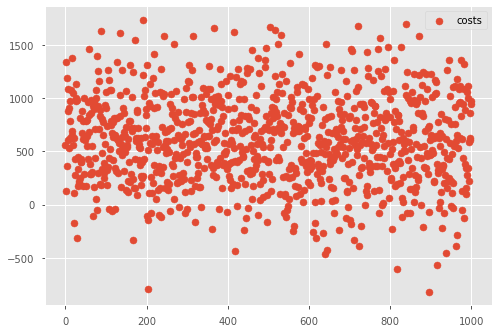

In [243]:
plt.scatter(x, cost_results, label='costs')
plt.legend()

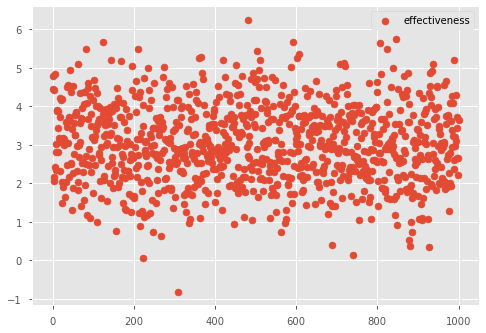

In [244]:
plt.scatter(x, effect_results, label='effectiveness')
plt.legend()

In [245]:
cost_effective_results = np.array(cost_results)/np.array(effect_results)

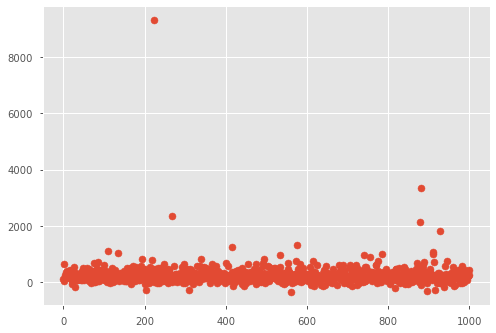

In [246]:
plt.scatter(x, cost_effective_results)

In [247]:
np.mean(cost_effective_results)

242.00756830497906

In [248]:
np.std(cost_effective_results)

373.1570953754808

In [251]:
np.mean(cost_effective_results)*2*np.std(cost_effective_results)

180613.68249513852

In [252]:
np.mean(cost_effective_results)*0.67*np.std(cost_effective_results)

60505.58363587141

The cost effectiveness has a very wide range....